In [60]:
from configure_dataframes import directory_to_dataframe
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
df = directory_to_dataframe("data")

In [62]:
df

,label,start_time,file_path,instrument,burst_type
0,burst,2022-03-31 18:46:00,data/2/2022-03-31 18-46-00_2022-03-31 18-47-00...,alaska_haarp_62,2
1,burst,2023-02-20 15:09:00,data/2/2023-02-20 15-09-00_2023-02-20 15-10-00...,humain_59,2
2,burst,2022-05-19 12:09:00,data/2/2022-05-19 12-09-00_2022-05-19 12-10-00...,humain_59,2
3,burst,2022-05-28 16:03:00,data/2/2022-05-28 16-03-00_2022-05-28 16-04-00...,humain_59,2
4,burst,2022-03-28 11:32:00,data/2/2022-03-28 11-32-00_2022-03-28 11-33-00...,humain_59,2
...,...,...,...,...,...
70957,no_burst,2022-07-22 04:00:00,data/no_burst/2022-07-22 04-00-00_2022-07-22 0...,alaska_haarp_62,no_burst
70958,no_burst,2022-08-22 05:49:00,data/no_burst/2022-08-22 05-49-00_2022-08-22 0...,humain_59,no_burst
70959,no_burst,2022-07-24 05:25:00,data/no_burst/2022-07-24 05-25-00_2022-07-24 0...,humain_59,no_burst
70960,no_burst,2021-11-03 21:40:00,data/no_burst/2021-11-03 21-40-00_2021-11-03 2...,australia_assa_01,no_burst


In [63]:
to_check = [
        "australia_assa_02",
        "australia_assa_62",
        "india_ooty_01",
        "glasgow_59",
        "swiss_landschlacht_01",
        "alaska_haarp_62",
        "humain_59",
    ]

In [64]:
df = df[df.instrument.isin(to_check)]
df.loc[:, 'is_burst'] = df['burst_type'].apply(lambda x: 1 if x != 'no_burst' else 0)

/tmp/ipykernel_1226152/1459963284.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'is_burst'] = df['burst_type'].apply(lambda x: 1 if x != 'no_burst' else 0)


In [65]:
df

,label,start_time,file_path,instrument,burst_type,is_burst
0,burst,2022-03-31 18:46:00,data/2/2022-03-31 18-46-00_2022-03-31 18-47-00...,alaska_haarp_62,2,1
1,burst,2023-02-20 15:09:00,data/2/2023-02-20 15-09-00_2023-02-20 15-10-00...,humain_59,2,1
2,burst,2022-05-19 12:09:00,data/2/2022-05-19 12-09-00_2022-05-19 12-10-00...,humain_59,2,1
3,burst,2022-05-28 16:03:00,data/2/2022-05-28 16-03-00_2022-05-28 16-04-00...,humain_59,2,1
4,burst,2022-03-28 11:32:00,data/2/2022-03-28 11-32-00_2022-03-28 11-33-00...,humain_59,2,1
...,...,...,...,...,...,...
70956,no_burst,2021-02-13 06:13:00,data/no_burst/2021-02-13 06-13-00_2021-02-13 0...,humain_59,no_burst,0
70957,no_burst,2022-07-22 04:00:00,data/no_burst/2022-07-22 04-00-00_2022-07-22 0...,alaska_haarp_62,no_burst,0
70958,no_burst,2022-08-22 05:49:00,data/no_burst/2022-08-22 05-49-00_2022-08-22 0...,humain_59,no_burst,0
70959,no_burst,2022-07-24 05:25:00,data/no_burst/2022-07-24 05-25-00_2022-07-24 0...,humain_59,no_burst,0


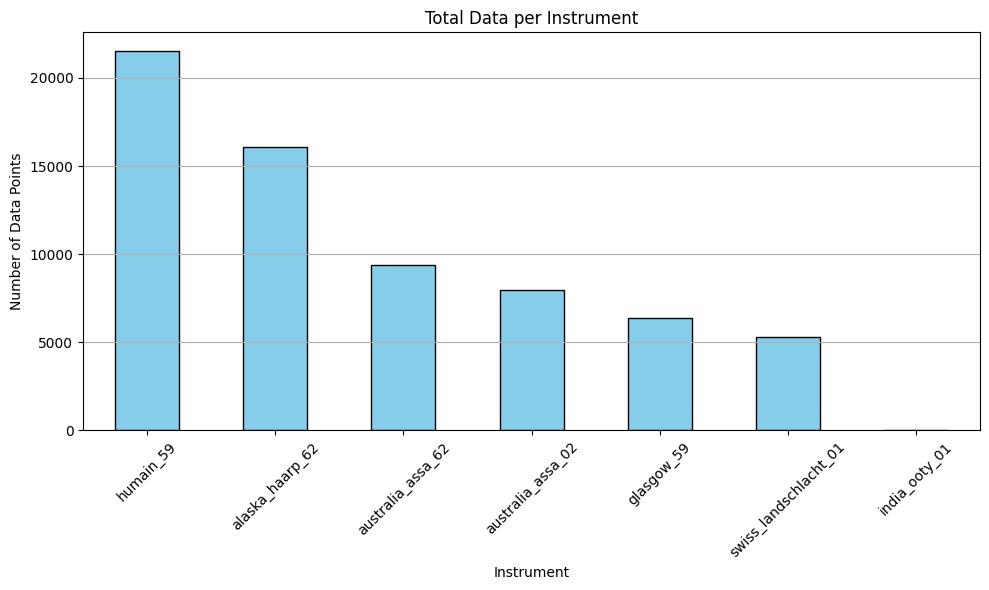

In [66]:
plt.figure(figsize=(10,6))
df['instrument'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Data per Instrument')
plt.xlabel('Instrument')
plt.ylabel('Number of Data Points')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


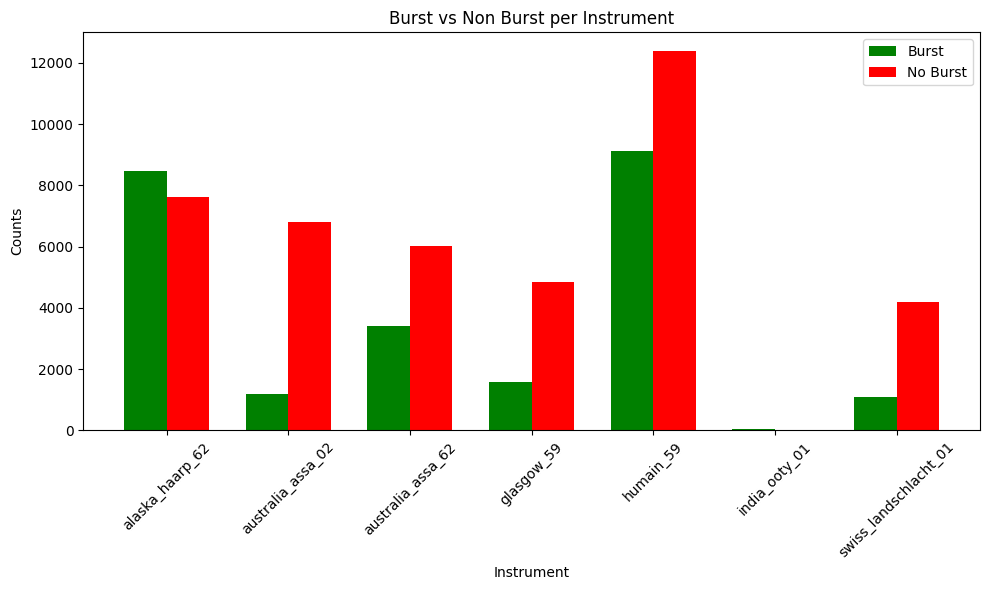

In [67]:
burst_counts = df.groupby('instrument')['is_burst'].sum()
total_counts = df['instrument'].value_counts()
no_burst_counts = total_counts - burst_counts

bar_width = 0.35
indices = range(len(burst_counts))

plt.figure(figsize=(10,6))
bar1 = plt.bar(indices, burst_counts, bar_width, label='Burst', color='green')
bar2 = plt.bar([i+bar_width for i in indices], no_burst_counts, bar_width, label='No Burst', color='red')

plt.xlabel('Instrument')
plt.ylabel('Counts')
plt.title('Burst vs Non Burst per Instrument')
plt.xticks([i+bar_width/2 for i in indices], burst_counts.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


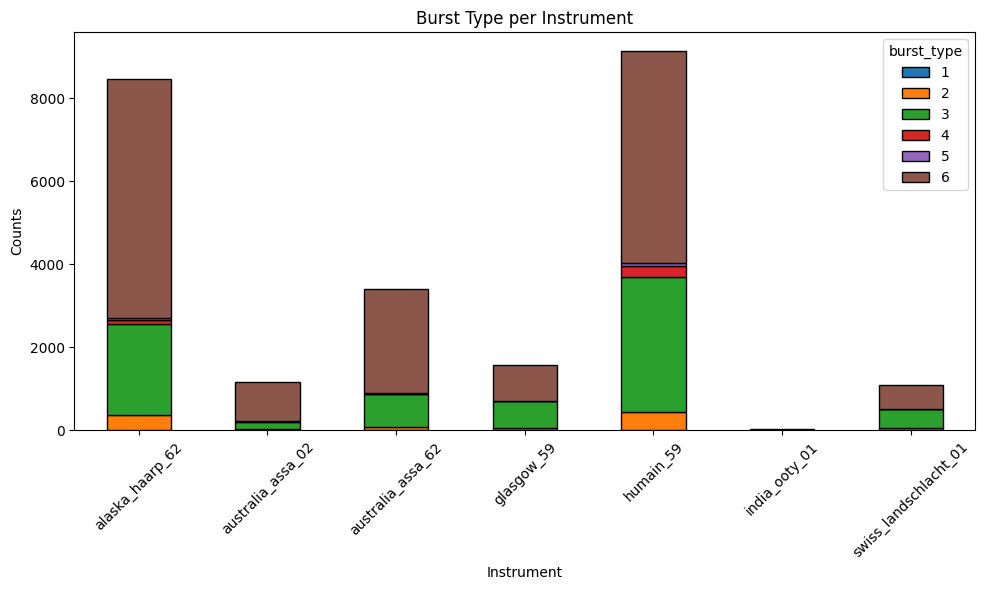

In [68]:
# Assuming that the 'burst_type' column is added to your DataFrame:
burst_type_counts = df[df['is_burst'] == 1].groupby(['instrument', 'burst_type']).size().unstack().fillna(0)

burst_type_counts.plot(kind='bar', stacked=True, figsize=(10, 6), edgecolor='black')
plt.title('Burst Type per Instrument')
plt.xlabel('Instrument')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipykernel_1226152/1784194406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['start_time'] = pd.to_datetime(df['start_time'])


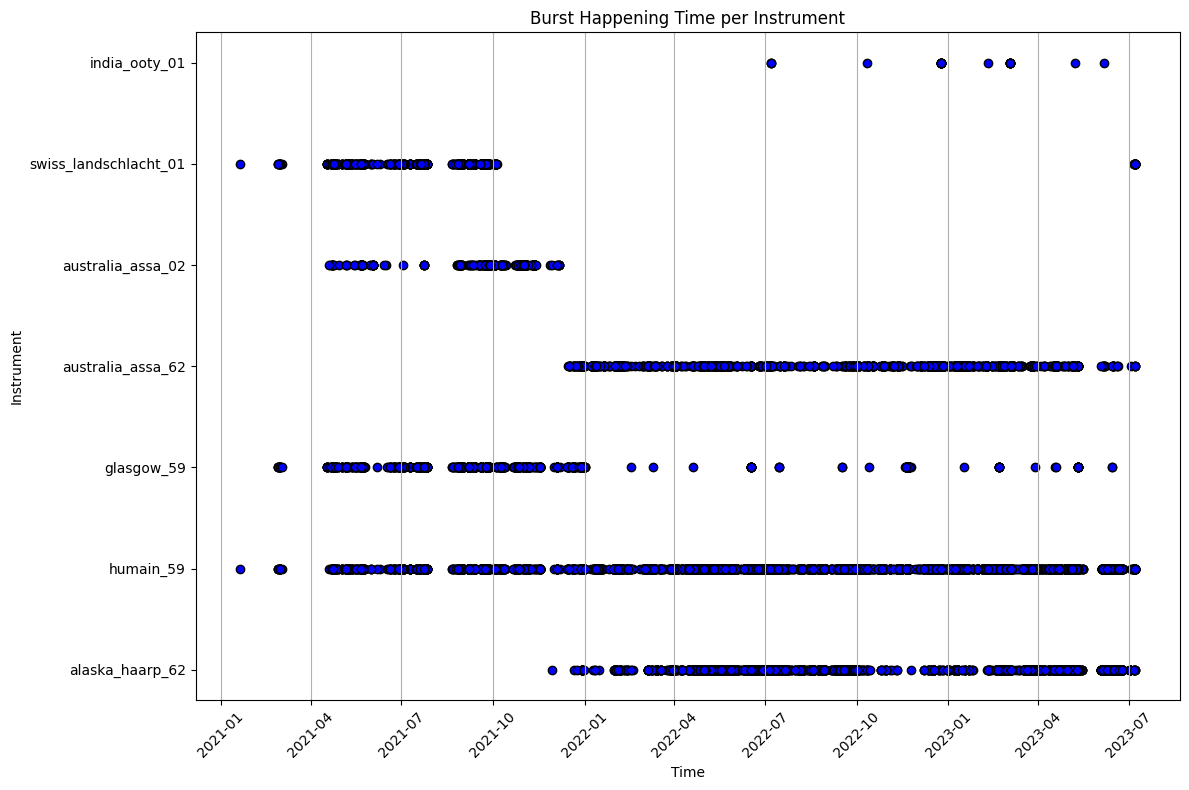

In [69]:
# Converting the 'start_time' to datetime
df['start_time'] = pd.to_datetime(df['start_time'])

# Selecting only the rows where a burst occurred
burst_data = df[df['is_burst'] == 1]

plt.figure(figsize=(12, 8))
plt.scatter(burst_data['start_time'], burst_data['instrument'], c='blue', edgecolor='black')

plt.title('Burst Happening Time per Instrument')
plt.xlabel('Time')
plt.ylabel('Instrument')
plt.xticks(rotation=45)
plt.grid(axis='x')
plt.tight_layout()
plt.show()

/tmp/ipykernel_1226152/3729176058.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df['start_time'].dt.hour


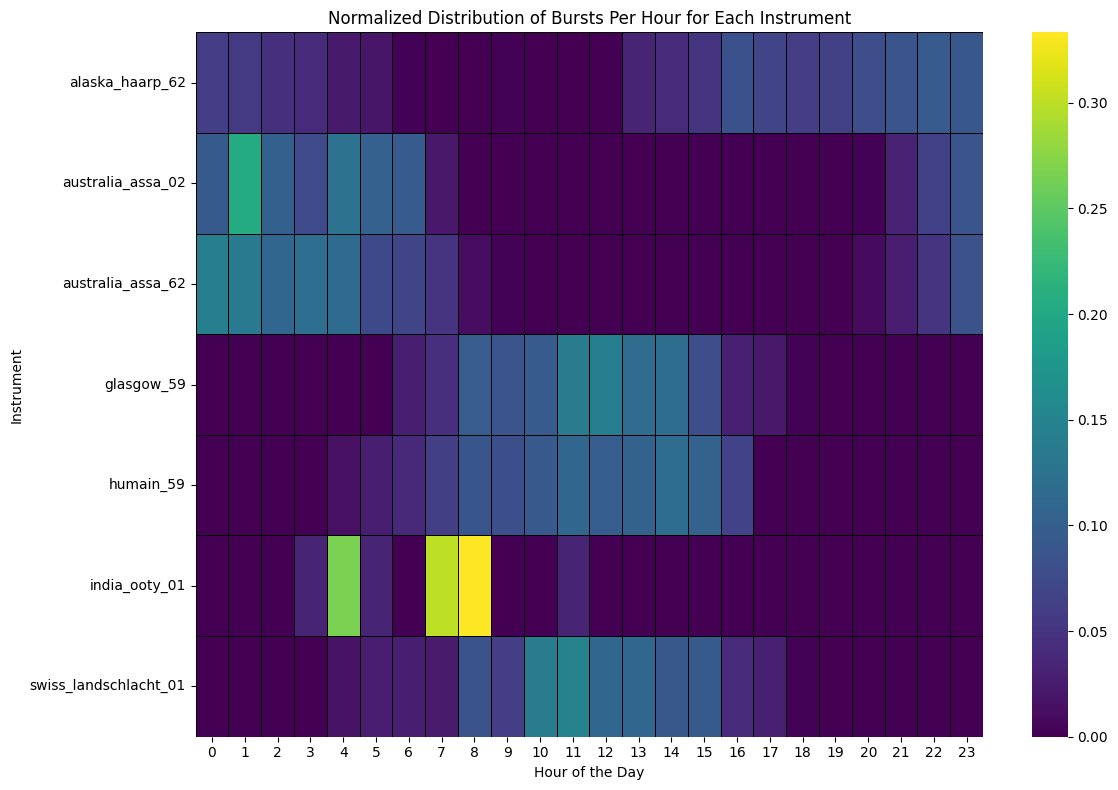

In [71]:
import seaborn as sns

# Extract the hour from the 'start_time' column
df['hour'] = df['start_time'].dt.hour

# Pivot the data to get a matrix with the count of bursts per instrument per hour
burst_hour_matrix = df[df['is_burst'] == 1].pivot_table(index='instrument', columns='hour', values='start_time', aggfunc='count').fillna(0)

# Normalize the matrix per instrument
burst_hour_matrix_normalized = burst_hour_matrix.div(burst_hour_matrix.sum(axis=1), axis=0)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(burst_hour_matrix_normalized, cbar=True, linewidths=0.5, linecolor='black', cmap='viridis')

plt.title('Normalized Distribution of Bursts Per Hour for Each Instrument')
plt.xlabel('Hour of the Day')
plt.ylabel('Instrument')
plt.tight_layout()
plt.show()
